In [4]:
import pandas as pd
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df1 = df.copy()

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([1, 0])

In [7]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [9]:
X = df[['Gender','Height']]
y = df['Weight']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [11]:
p_value = clf.predict(X_test)

In [13]:
clf.score(X_test,y_test)

0.8923208517502554

# So Accuracy is 89%

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [17]:
MAE = mean_absolute_error(y_test,p_value)
MSE = mean_squared_error(y_test,p_value)
print(MAE)  #The Result of MAE
print(MSE) #The Result of MSE

8.114019676387473
108.79424312369522


# The Result of MAE : 8.11
# The Result of MSE : 108.79

# Now KN  Algorithm

In [19]:
X = df1[['Weight','Height']]
y = df1['Gender']
y =df.Gender.replace(['Male','Female'],[1,0])
X = pd.get_dummies(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
KNN = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='kd_tree',leaf_size=30,p=2,metric='minkowski',n_jobs=-1)

KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [21]:
Y_pred = KNN.predict(X_test)
KNN.score(X_test,y_test)

0.905726529022205

# Accuracy is 91%

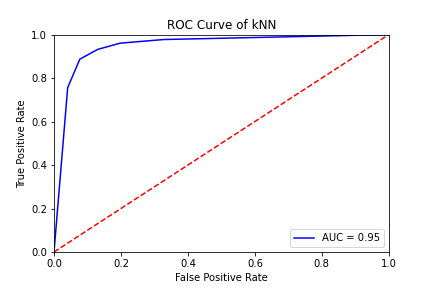

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
y_scores = KNN.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[::, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# Using KNN Regressor

In [40]:
from sklearn.neighbors import KNeighborsRegressor
# Weight function used in prediction = uniform
kn_reg = KNeighborsRegressor(n_neighbors=5)
kn_reg.fit(X_train, y_train)
knreg_test_pred = kn_reg.predict(X_test)

kn_dist_reg = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn_dist_reg.fit(X_train, y_train)
knreg_dist_test_pred = kn_dist_reg.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
kn_reg_mse = mean_squared_error(y_test, knreg_test_pred)
kn_reg_mse

0.07431242695753798

In [43]:
kn_reg_mae = mean_absolute_error(y_test, knreg_test_pred)
kn_reg_mae

0.12162056875730426

In [44]:
kn_reg_dist_mse = mean_squared_error(y_test, knreg_dist_test_pred)
kn_reg_dist_mse

0.07737874604293261

# Start Hypertune

In [47]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, random_state=43, test_size=.30)

In [48]:
xtrain.shape

(5988, 2)

In [49]:
xtest.shape

(2567, 2)

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
ran1 = RandomForestClassifier()

In [54]:
ran1.fit(xtrain, ytrain)

RandomForestClassifier()

In [55]:
ran1.score(xtest,ytest)

0.9127386053759252

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
kn = KNeighborsClassifier(n_neighbors=100)
kn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=100)

In [59]:
kn.score(xtest, ytest)

0.9224776003116478

In [60]:
import numpy as np
trees = [int(x) for x in np.linspace(start=15, stop=200, num=25)]

In [61]:
total_tees = np.random.randint(15,200,25)

In [62]:
total_tees

array([189,  92,  22, 166,  43,  81, 119,  71,  75,  43, 157,  58,  28,
       157, 122, 127,  57,  53, 144, 119,  72, 160, 176, 165,  51])

In [63]:
criterions = ['gini','entropy']
min_samples_split = np.random.randint(1,3,10)
min_samples_leaf = [1,2]
max_features = ['sqrt', 'log2']

In [65]:
grids = {
    'n_estimators': total_tees,
    'criterion':  criterions,
    'min_samples_split': min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features
}
print(grids)

{'n_estimators': array([189,  92,  22, 166,  43,  81, 119,  71,  75,  43, 157,  58,  28,
       157, 122, 127,  57,  53, 144, 119,  72, 160, 176, 165,  51]), 'criterion': ['gini', 'entropy'], 'min_samples_split': array([2, 2, 1, 1, 2, 2, 2, 1, 1, 1]), 'min_samples_leaf': [1, 2], 'max_features': ['sqrt', 'log2']}


# Randomized Search CV

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
rando = RandomizedSearchCV(estimator=ran1, param_distributions=grids, n_iter=200, cv=3)

In [68]:
rando

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': array([2, 2, 1, 1, 2, 2, 2, 1, 1, 1]),
                                        'n_estimators': array([189,  92,  22, 166,  43,  81, 119,  71,  75,  43, 157,  58,  28,
       157, 122, 127,  57,  53, 144, 119,  72, 160, 176, 165,  51])})

In [79]:
#rando.fit(xtrain, ytrain)

In [80]:
rando.best_params_

{'n_estimators': 157,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'criterion': 'gini'}

In [81]:
rando.cv_results_

{'mean_fit_time': array([0.37299999, 0.12933342, 0.62166683, 0.47766662, 0.08333325,
        1.01066661, 0.11300008, 0.28200006, 0.11300008, 0.03733341,
        0.10599995, 0.01866674, 0.03666663, 0.22166673, 0.47966647,
        0.84933329, 0.1486667 , 1.13166666, 0.10599995, 0.08033331,
        0.87433314, 0.87299999, 0.80100004, 0.40133333, 0.04333321,
        1.21999979, 0.11333338, 0.08266664, 0.86733317, 0.1170001 ,
        0.04800002, 0.23566667, 0.30533314, 0.02299992, 0.34433349,
        0.13533338, 0.05600015, 0.29000004, 0.11899996, 0.05333336,
        0.03899995, 0.46566661, 0.10666664, 1.19133337, 0.08199994,
        0.1183331 , 0.11166644, 0.09766666, 1.06900001, 0.08333341,
        0.67466656, 0.09999998, 0.10033337, 0.77066668, 0.05033326,
        0.28899995, 0.03233329, 0.92599988, 0.60800004, 0.45900003,
        0.77866658, 0.60833327, 0.03766672, 0.18500002, 0.28966681,
        0.14433328, 0.45599993, 0.08600005, 0.28700002, 0.08733336,
        0.78466686, 1.04966656,

In [82]:
result = pd.DataFrame(rando.cv_results_)

In [83]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.373000,0.000816,0.026333,0.000471,57,2,2,sqrt,entropy,"{'n_estimators': 57, 'min_samples_split': 2, '...",0.906313,0.913828,0.912325,0.910822,0.003247,28
1,0.129333,0.002055,0.000000,0.000000,189,1,1,sqrt,entropy,"{'n_estimators': 189, 'min_samples_split': 1, ...",NaN,NaN,NaN,NaN,NaN,164
2,0.621667,0.008380,0.040333,0.000471,92,2,1,sqrt,entropy,"{'n_estimators': 92, 'min_samples_split': 2, '...",0.907816,0.909820,0.908818,0.908818,0.000818,45
3,0.477667,0.005249,0.039667,0.000471,92,2,1,log2,gini,"{'n_estimators': 92, 'min_samples_split': 2, '...",0.906313,0.907816,0.905311,0.906480,0.001029,78
4,0.083333,0.001247,0.000000,0.000000,122,1,1,sqrt,entropy,"{'n_estimators': 122, 'min_samples_split': 1, ...",NaN,NaN,NaN,NaN,NaN,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.193667,0.005437,0.014667,0.000471,28,2,1,log2,entropy,"{'n_estimators': 28, 'min_samples_split': 2, '...",0.903808,0.909319,0.903307,0.905478,0.002724,87
196,0.340667,0.001886,0.024000,0.000816,53,2,2,log2,entropy,"{'n_estimators': 53, 'min_samples_split': 2, '...",0.903307,0.915832,0.907315,0.908818,0.005223,45
197,0.118333,0.004028,0.000000,0.000000,176,1,2,log2,entropy,"{'n_estimators': 176, 'min_samples_split': 1, ...",NaN,NaN,NaN,NaN,NaN,106
198,0.108000,0.000816,0.010667,0.000471,22,2,2,log2,gini,"{'n_estimators': 22, 'min_samples_split': 2, '...",0.907315,0.914329,0.910822,0.910822,0.002863,27


In [84]:
rando.best_score_

0.9134936539746158

In [85]:
ran = rando.best_estimator_
ran

RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                       n_estimators=157)

In [86]:
ran.fit(xtrain, ytrain)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                       n_estimators=157)

In [87]:
ran.score(xtest, ytest)

0.9131281651733542